<a href="https://colab.research.google.com/github/SterlingHayden/Gradient-Descent-Methods/blob/main/GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 13: Gradient Descent Method for Unconstrained Nonlinear Programs

---

## Objectives

Students will be skilled at

1. implementing and applying the gradient descent algorithm to solve unconstrained nonlinear programming problems


## References

1. [Scipy Documentation](https://scipy.org/)

## Importing numpy, matplotlib, and scipy

We will use numpy to assist in implementing numerical subroutines.  We will also use matplotlib to visualize the algorithms.

In [ ]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as pt

We will also show how to solve unconstrained optimization problems using scipy

In [ ]:
from scipy.optimize import minimize

## Example 1: Implementing Gradient Descent on a 2-Variable Problem

### Statement of Optimization Model (from Hillier and Lieberman, 2005)

$\begin{align}
\min_{x_1, x_2} \  &&& f(x_1,x_2) = x_1^2 + 2x_2^2 - 2x_1x_2 - 2x_2
\end{align}$

In [ ]:
# Write a python function to evaluate the objective function
# Will assume as input a numpy.array x of length 2; elements are x[0] and x[1]
def f(x):
  return x[0]**2 + 2*x[1]**2 - 2*x[0]*x[1] - 2*x[1]

In [ ]:
# Test the function using values we computed by hand in the class notes
x = np.array([0,0])
print(f(x))

x2 = np.array([0,2])
print(f(x2))

x3 = np.array([0,1])
print(f(x3))

x4 = np.array([0.5,.5])
print(f(x4))


0
4
0
-0.75


### Statement of Objective Function Gradient

$\nabla f(x_1, x_2) = \left[\begin{array}{r} 2x_1 - 2x_2 \\ -2x_1 + 4x_2 - 2\end{array} \right]$

In [ ]:
# Write a python function to evaluate the gradient
def f_gradient(x):
  return np.array([2*x[0] - 2*x[1] , -2*x[0] + 4*x[1] -2 ])

In [ ]:
# Test the function using values we computed by hand in the class notes
x = np.array([0,0])
print(f_gradient(x))

x2 = np.array([0,0.5])
print(f_gradient(x2))

[ 0 -2]
[-1.  0.]


### Plot the Objective Function

Text(0, 0.5, '$x_2$')

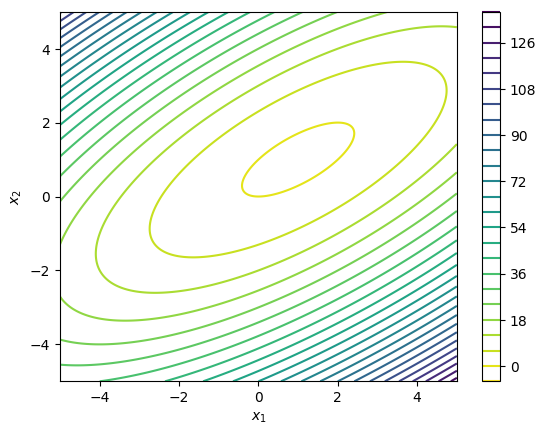

In [ ]:
xmesh, ymesh = np.mgrid[-5:5:500j, -5:5:500j]
fmesh = f(np.array([xmesh, ymesh]))
pt.contour(xmesh,ymesh,fmesh,25, cmap = pt.cm.viridis_r)
pt.xlim([-5,5])
pt.ylim([-5,5])
pt.colorbar()
pt.xlabel('$x_1$')
pt.ylabel('$x_2$')

### Implement a Single Gradient Descent Step

In the gradient descent method, we perform the update

$\mathbf{x}^{(k+1)} \leftarrow \mathbf{x}^{(k)} + t^{(k)}\mathbf{d}^{(k)}$

where $\mathbf{x}^{(k)}$ is the solution in iteration $k$, $t^{(k)}$ is the step size in iteration $k$, and $\mathbf{d}^{(k)} = -\nabla f(\mathbf{x}^{(k)})$ is the search direction in iteration $k$.

In [ ]:
# Write a function that computes the next solution given the current solution and the step size
def gd_update(current_sol, step_size):
  return current_sol - step_size*f_gradient(current_sol)

In [ ]:
# Test the function using values we computed in the class notes
x = np.array([0,0])
print(gd_update(x,1))
print(gd_update(x,.5))
print(gd_update(x,.25))
print("--------------------------------------")
x2 = np.array([0,0.5])
print(gd_update(x2,1))
print(gd_update(x2,.5))
print(gd_update(x2,.25))

[0 2]
[0. 1.]
[0.  0.5]
--------------------------------------
[1.  0.5]
[0.5 0.5]
[0.25 0.5 ]


### Implement Gradient Descent with a Fixed Step Size

Let's start by implementing the gradient descent method with a fixed step size, e.g., $t=1$.  As we will see, the method is not guaranteed to converge in this case; therefore, we have added a parameter ``max_iter'' to specify the maximum number of iterations.  The stopping criteria are:

1. $||\nabla f(x)||_2\leq \eta$
2. Total number of iterations exceeds max_iter

In [ ]:
# test norm
x = np.array([3,4])
print(LA.norm(x))

5.0


In [ ]:
# Write a function that runs the gradient descent method with fixed step size
# Use the following inputs
#   initial_sol = a numpy.array that contains the starting solution
#   step_size = a scalar that indicates the step size t for each step
#   eta = the upper bound on the gradient's norm required to trigger the stopping condition
#   max_iter = a maximum number of iterations
def graident_descent_fixedstep(initial_sol, step_size, eta, max_iter):
  sol = initial_sol
  #print("Solution: ",sol)
  #print("Obj Value: ",f(sol))
  sol_hist = [sol]
  obj_hist = [f(sol)]
  num_iter = 0
  while LA.norm(f_gradient(sol)) > eta and num_iter < max_iter:
    sol = gd_update(sol, step_size)
    #print("Solution: ",sol)
    #print("Obj Value: ",f(sol))
    sol_hist.append(sol)
    obj_hist.append(f(sol))
    num_iter += 1

  return (sol, num_iter, sol_hist, obj_hist)

In [ ]:
# Execute the gradient descent method with step size 1
initial_sol = np.array([4,2])
#change step size and see graph
(sol, num_iter, sol_hist, obj_hist) = graident_descent_fixedstep(initial_sol, .1, 0.000001, 500)
print(sol)
print(f(sol))
print(num_iter)
print(sol_hist)
print(obj_hist)

[1.00000108 1.00000067]
-0.9999999999993858
185
[array([4, 2]), array([3.6, 2.2]), array([3.32, 2.24]), array([3.104, 2.208]), array([2.9248, 2.1456]), array([2.76896, 2.07232]), array([2.629632, 1.997184]), array([2.5031424, 1.9242368]), array([2.38736128, 1.85517056]), array([2.28092314, 1.79057459]), array([2.18285343, 1.73052938]), array([2.09238862, 1.67488831]), array([2.00888856, 1.62341071]), array([1.93179299, 1.57582414]), array([1.86059922, 1.53185308]), array([1.79484999, 1.49123169]), array([1.73412633, 1.45370901]), array([1.67804287, 1.41905067]), array([1.62624443, 1.38703898]), array([1.57840334, 1.35747227]), array([1.53421713, 1.33016403]), array([1.49340651, 1.30494184]), array([1.45571357, 1.28164641]), array([1.42090014, 1.26013056]), array([1.38874622, 1.24025836]), array([1.35904865, 1.22190426]), array([1.33161977, 1.20495229]), array([1.30628628, 1.18929533]), array([1.28288809, 1.17483445]), array([1.26127736, 1.16147829]), array([1.24131755, 1.14914245]), ar

In [ ]:
# Try using a smaller step size and increase the number of iterations

In [ ]:
# Try starting at a different solution

Text(0.5, 1.0, 'Iterates of the gradient descent method with fixed step size')

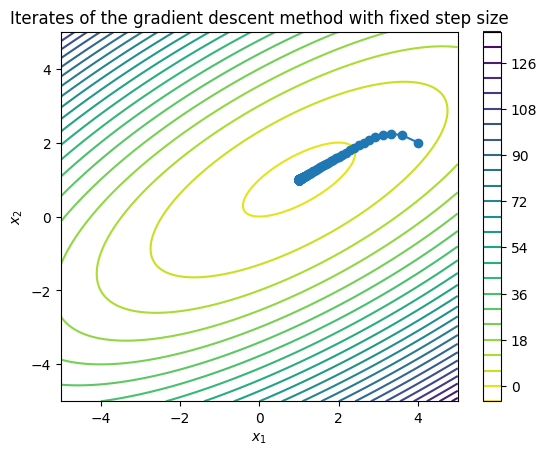

In [ ]:
# Generate a plot of the gradient descent iterates
iteration_history = np.array(sol_hist)
pt.contour(xmesh,ymesh,fmesh,25, cmap = pt.cm.viridis_r)
pt.xlim([-5,5])
pt.ylim([-5,5])
pt.colorbar()
pt.plot(iteration_history.T[0], iteration_history.T[1], "o-")
pt.xlabel('$x_1$')
pt.ylabel('$x_2$')
pt.title('Iterates of the gradient descent method with fixed step size')

### Implement Gradient Descent Using Backtracking Line Search

As we saw in the previous section, using a fixed step size may cause the algorithm to diverge.  Here, we address this by implementing backtracking line search.  Pseudocode for backtracking line search follows.

------------

**Pseudocode for backtracking line search**

* **given** a solution $\mathbf{x}$, descent direction $\mathbf{d}$, and parameter values $\alpha \in (0,0.5)$ and $\beta \in (0,1)$
* **set** $t \leftarrow 1$

* **while** $f(\mathbf{x}+t\mathbf{d}) > f(\mathbf{x}) + \alpha t \nabla f(\mathbf{x})^T \mathbf{d}$, set $t \leftarrow \beta t$



In [ ]:
# Write a python function to perform backtracking line search
# Use the following inputs
#   current_sol = a numpy.array that contains the current solution
#   descent_dir = a numpy.array that contains the descent direction
#   alpha = a scalar that contains the value of parameter alpha
#   beta = a scalar that contains the value of parameter beta
def backtracking_linesearch(current_sol, descent_dir, alpha, beta):
  t = 1
  while f(current_sol + t*descent_dir) > f(current_sol) + alpha*t*np.dot(f_gradient(current_sol), descent_dir):
    t = beta*t

  return t

In [ ]:
# Test backtracking using example from the notes
x = np.array([0,0])
print(backtracking_linesearch(x, -f_gradient(x), .3, .5))
x2 = np.array([0,0.5])
print(backtracking_linesearch(x2, -f_gradient(x2), .3, .5))

0.25
0.5


In [ ]:
# Write a function that runs the gradient descent method with backtracking line search
# Use the following inputs
#   initial_sol = a numpy.array that contains the starting solution
#   eta = the upper bound on the gradient's norm required to trigger the stopping condition
#   max_iter = a maximum number of iterations
#   alpha = the alpha parameter from backtracking line search
#   beta = the beta parameter from backtracking line search
def graident_descent_backtrackingstep(initial_sol, eta, max_iter, alpha, beta):
  sol = initial_sol
  sol_hist = [sol]
  obj_hist = [f(sol)]
  num_iter = 0
  while LA.norm(f_gradient(sol)) > eta and num_iter < max_iter:
    step_size = backtracking_linesearch(sol, -f_gradient(sol), alpha, beta)
    sol = gd_update(sol, step_size)
    sol_hist.append(sol)
    obj_hist.append(f(sol))
    num_iter += 1

  return (sol, num_iter, sol_hist, obj_hist)

In [ ]:
# Try it
initial_sol = np.array([5,5])
(sol, num_iter, sol_hist, obj_hist) = graident_descent_backtrackingstep(initial_sol, .000001, 500, .3, .5)
print(sol)
print(f(sol))
print(num_iter)
print(sol_hist)
print(obj_hist)

[1.00000095 1.00000048]
-0.9999999999995453
45
[array([5, 5]), array([5., 3.]), array([3., 3.]), array([3., 2.]), array([2., 2.]), array([2. , 1.5]), array([1.5, 1.5]), array([1.5 , 1.25]), array([1.25, 1.25]), array([1.25 , 1.125]), array([1.125, 1.125]), array([1.125 , 1.0625]), array([1.0625, 1.0625]), array([1.0625 , 1.03125]), array([1.03125, 1.03125]), array([1.03125 , 1.015625]), array([1.015625, 1.015625]), array([1.015625 , 1.0078125]), array([1.0078125, 1.0078125]), array([1.0078125 , 1.00390625]), array([1.00390625, 1.00390625]), array([1.00390625, 1.00195312]), array([1.00195312, 1.00195312]), array([1.00195312, 1.00097656]), array([1.00097656, 1.00097656]), array([1.00097656, 1.00048828]), array([1.00048828, 1.00048828]), array([1.00048828, 1.00024414]), array([1.00024414, 1.00024414]), array([1.00024414, 1.00012207]), array([1.00012207, 1.00012207]), array([1.00012207, 1.00006104]), array([1.00006104, 1.00006104]), array([1.00006104, 1.00003052]), array([1.00003052, 1.000

Text(0.5, 1.0, 'Iterates of the gradient descent method with fixed step size')

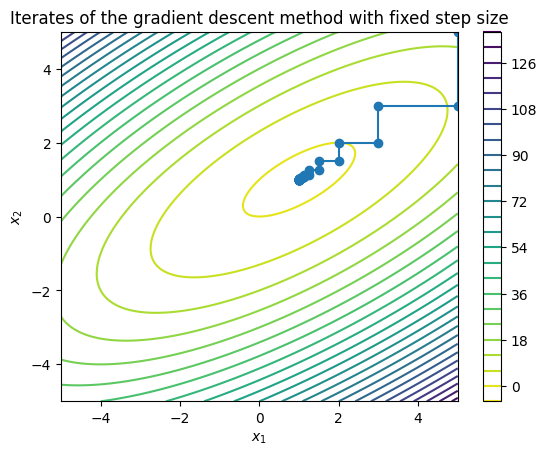

In [ ]:
# Plot it
iteration_history = np.array(sol_hist)
pt.contour(xmesh,ymesh,fmesh,25, cmap = pt.cm.viridis_r)
pt.xlim([-5,5])
pt.ylim([-5,5])
pt.colorbar()
pt.plot(iteration_history.T[0], iteration_history.T[1], "o-")
pt.xlabel('$x_1$')
pt.ylabel('$x_2$')
pt.title('Iterates of the gradient descent method with fixed step size')

### Verify Results Using scipy.optimize

Scipy contains a suite of algorithms that can be used to solve unconstrained nonlinear programs.  Some of these algorithms require the user to supply a gradient and/or Hessian - see the [Scipy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) for more details.

In [ ]:
initial_sol = np.array([-4,-4])
result = minimize(f, initial_sol, method='BFGS', jac=f_gradient, options={'disp':True})
print(result.x)

Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 4
[1. 1.]
